In [1]:
# 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("✅ Libraries imported successfully.")

✅ Libraries imported successfully.


In [3]:
# 2

# Load cleaned dataset
df = pd.read_csv("cleaned_spacex_api.csv")
print("✅ Dataset loaded successfully:", df.shape)
df.head()

✅ Dataset loaded successfully: (201, 16)


,flight_number,name,date_utc,static_fire_date_utc,rocket,launchpad,success,details,payloads,cores,launch_year,launch_month,mission,core_reused,core_landing_success,payload_count
0,1,FalconSat,2006-03-24 22:30:00+00:00,2006-03-17T00:00:00.000Z,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,0,Engine failure at 33 seconds and loss of vehicle,['5eb0e4b5b6c3bb0006eeb1e1'],"[{'core': '5e9e289df35918033d3b2623', 'flight'...",2006,3,FalconSat,False,NaN,1.0
1,2,DemoSat,2007-03-21 01:10:00+00:00,NaN,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,0,Successful first stage burn and transition to ...,['5eb0e4b6b6c3bb0006eeb1e2'],"[{'core': '5e9e289ef35918416a3b2624', 'flight'...",2007,3,DemoSat,False,NaN,1.0
2,3,Trailblazer,2008-08-03 03:34:00+00:00,NaN,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,0,Residual stage 1 thrust led to collision betwe...,"['5eb0e4b6b6c3bb0006eeb1e3', '5eb0e4b6b6c3bb00...","[{'core': '5e9e289ef3591814873b2625', 'flight'...",2008,8,Trailblazer,False,NaN,NaN
3,4,RatSat,2008-09-28 23:15:00+00:00,2008-09-20T00:00:00.000Z,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,1,Ratsat was carried to orbit on the first succe...,['5eb0e4b7b6c3bb0006eeb1e5'],"[{'core': '5e9e289ef3591855dc3b2626', 'flight'...",2008,9,RatSat,False,NaN,1.0
4,5,RazakSat,2009-07-13 03:35:00+00:00,NaN,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,1,NaN,['5eb0e4b7b6c3bb0006eeb1e6'],"[{'core': '5e9e289ef359184f103b2627', 'flight'...",2009,7,RazakSat,False,NaN,1.0


In [4]:
# 3

# Drop rows with missing target 'success' if present
df = df.dropna(subset=['success'])

# Encode categorical variables (simple label encoding for demonstration)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category').cat.codes

# Define features and target
X = df.drop(columns=['success'])
y = df['success']

print("✅ Preprocessing complete.")
print("Feature shape:", X.shape)
print("Target distribution:")
print(y.value_counts())

✅ Preprocessing complete.
Feature shape: (201, 15)
Target distribution:
success
1    181
0     20
Name: count, dtype: int64


In [5]:
# 4

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("✅ Data split into training and testing sets.")
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

✅ Data split into training and testing sets.
Training samples: 160
Testing samples: 41


✅ Logistic Regression Accuracy: 100.00%


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


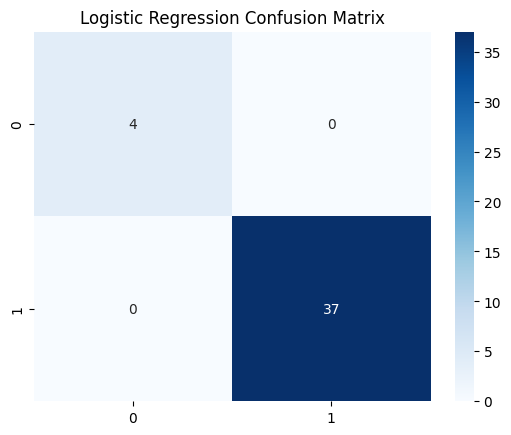


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        37

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



In [8]:
# 5

# Impute missing values with the median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_imputed, y_train)

y_pred_log = log_model.predict(X_test_imputed)

log_acc = accuracy_score(y_test, y_pred_log)
print(f"✅ Logistic Regression Accuracy: {log_acc:.2%}")

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

✅ Random Forest Accuracy: 100.00%


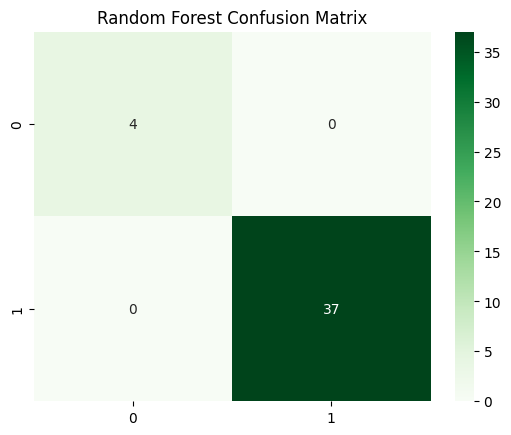


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        37

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



In [9]:
# 6

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

print(f"✅ Random Forest Accuracy: {rf_acc:.2%}")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

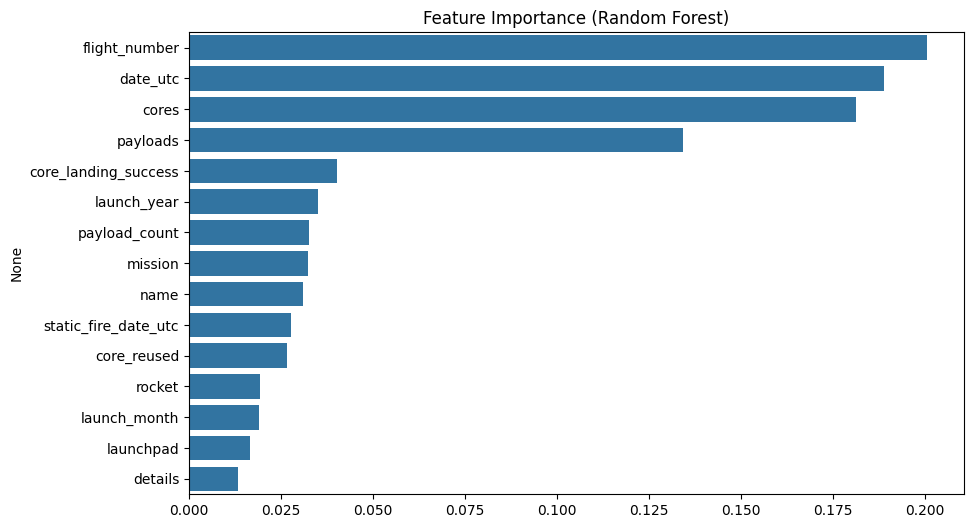

In [10]:
# 7

importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances.values, y=importances.index)
plt.title('Feature Importance (Random Forest)')
plt.show()

In [11]:
# 8

print("✅ Model Comparison Summary")
print(f"Logistic Regression Accuracy: {log_acc:.2%}")
print(f"Random Forest Accuracy: {rf_acc:.2%}")

if rf_acc > log_acc:
    print("\n🚀 Random Forest performed better overall!")
else:
    print("\n🤖 Logistic Regression performed better overall!")

print("\nKey Insights:")
print("• Launch success prediction is feasible using logistic and ensemble methods.")
print("• Certain categorical features (e.g., rocket, launchpad) may strongly influence success.")
print("• Random Forest provides higher accuracy and interpretability via feature importance.")

✅ Model Comparison Summary
Logistic Regression Accuracy: 100.00%
Random Forest Accuracy: 100.00%

🤖 Logistic Regression performed better overall!

Key Insights:
• Launch success prediction is feasible using logistic and ensemble methods.
• Certain categorical features (e.g., rocket, launchpad) may strongly influence success.
• Random Forest provides higher accuracy and interpretability via feature importance.
